In [449]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [450]:
facebook = pd.read_csv(r"C:\Users\Admin\Downloads\KAG_conversion_data.csv")

In [451]:
facebook.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [452]:
facebook.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [453]:
facebook.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [454]:
facebook["xyz_campaign_id"].nunique()

3

In [455]:
facebook["xyz_campaign_id"].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [456]:
facebook["xyz_campaign_id"]= facebook["xyz_campaign_id"].replace({1178:"campaign_C",
                                    936:"campaign_B",916:"campaign_A"})

facebook = facebook.drop(["ad_id"], axis = 1)


In [457]:
facebook.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,campaign_A,103916,30-34,M,15,7350,1,1.43,2,1
1,campaign_A,103917,30-34,M,16,17861,2,1.82,2,0
2,campaign_A,103920,30-34,M,20,693,0,0.00,1,0
3,campaign_A,103928,30-34,M,28,4259,1,1.25,1,0
4,campaign_A,103928,30-34,M,28,4133,1,1.29,1,1


In [458]:
facebook = facebook.rename(columns = {'Total_Conversion':'SQL','Approved_Conversion':'Conversion', 'xyz_campaign_id':'Campaigns'})
facebook.columns

Index(['Campaigns', 'fb_campaign_id', 'age', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'SQL', 'Conversion'],
      dtype='object')

In [459]:
best_campaign = facebook.groupby("Campaigns")['SQL'].sum()
best_campaign 

Campaigns
campaign_A      58
campaign_B     537
campaign_C    2669
Name: SQL, dtype: int64

In [460]:
conv_campaign = facebook.groupby("Campaigns")['Conversion'].sum()
conv_campaign 

Campaigns
campaign_A     24
campaign_B    183
campaign_C    872
Name: Conversion, dtype: int64

In [461]:
Age_campaign = facebook.groupby("Campaigns")['gender'].count()
Age_campaign 

Campaigns
campaign_A     54
campaign_B    464
campaign_C    625
Name: gender, dtype: int64

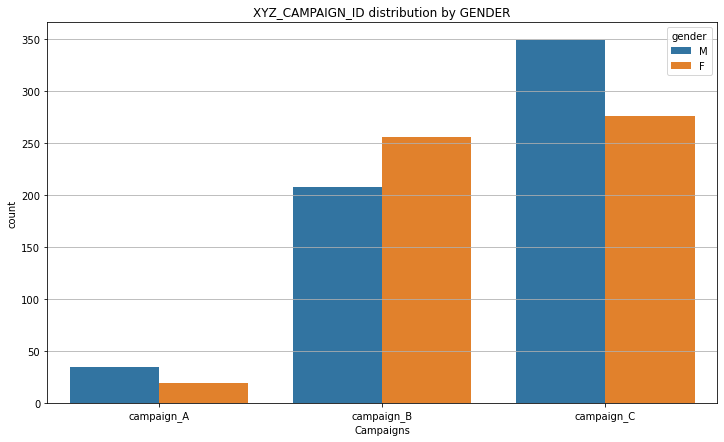

In [462]:
fig=plt.figure(figsize=(12,7))
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

sns.countplot(data=facebook, x='Campaigns', hue='gender')
plt.title('XYZ_CAMPAIGN_ID distribution by GENDER')
plt.grid(axis='y')

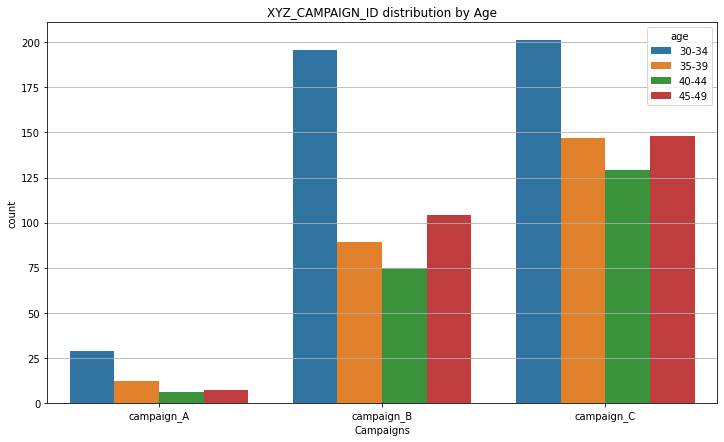

In [463]:
fig=plt.figure(figsize=(12,7))

sns.countplot(data=facebook, x='Campaigns', hue='age')
plt.title('XYZ_CAMPAIGN_ID distribution by Age')
plt.grid(axis='y')

Text(0.5, 1.0, 'XYZ_CAMPAIGN_ID distribution by conversion')

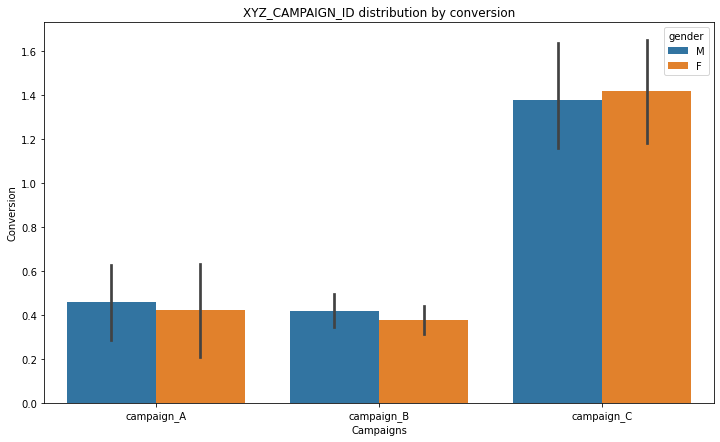

In [464]:
fig=plt.figure(figsize=(12,7))

sns.barplot(data=facebook, x='Campaigns', y= 'Conversion', hue='gender')
plt.title('XYZ_CAMPAIGN_ID distribution by conversion')


In [465]:
# lets add More Features to Understand the Return on Investment also known as ROAS(Return on Ad Spend)

# lets calculate the Conversion Value, Let's Assume that the Value of Sales if 100 Dollars
facebook['ConversionValue'] = facebook['Conversion']*100

# lets calculate the ROAS Which is the Target Variable for us
facebook['ROAS'] = round(facebook['Conversion']/facebook['Spent'], 2)

# lets Calculate CPM to understand the Brand Awareness from Campaigns
facebook['CPM'] = round((facebook['Spent']/facebook['Impressions'])*1000, 2)

In [466]:
# Performing Feature Engineering to understand the Campaigns in Detail

# lets create a Column to understand CTR
facebook['ClickThroughRate'] = ((facebook['Clicks']/facebook['Impressions'])*100)

# lets create a column to understand CPC
facebook['CostPerClick'] = (facebook['Spent']/facebook['Clicks'])

# lets create a column to understand Conversion Rate
facebook['ConversionRate'] = (facebook['Conversion']/facebook['SQL'])

# lets create a column to understand the Cost per Conversion
facebook['CostPerConversion'] = (facebook['Spent']/facebook['Conversion']) 

In [467]:
facebook.head()

,Campaigns,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,SQL,Conversion,ConversionValue,ROAS,CPM,ClickThroughRate,CostPerClick,ConversionRate,CostPerConversion
0,campaign_A,103916,30-34,M,15,7350,1,1.43,2,1,100,0.70,0.19,0.013605,1.43,0.5,1.43
1,campaign_A,103917,30-34,M,16,17861,2,1.82,2,0,0,0.00,0.10,0.011198,0.91,0.0,inf
2,campaign_A,103920,30-34,M,20,693,0,0.00,1,0,0,NaN,0.00,0.000000,NaN,0.0,NaN
3,campaign_A,103928,30-34,M,28,4259,1,1.25,1,0,0,0.00,0.29,0.023480,1.25,0.0,inf
4,campaign_A,103928,30-34,M,28,4133,1,1.29,1,1,100,0.78,0.31,0.024195,1.29,1.0,1.29


In [468]:
facebook.shape

(1143, 17)

In [469]:
facebook = facebook.dropna(axis=0)


In [470]:
facebook.shape

(931, 17)

In [471]:
facebook.head()

,Campaigns,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,SQL,Conversion,ConversionValue,ROAS,CPM,ClickThroughRate,CostPerClick,ConversionRate,CostPerConversion
0,campaign_A,103916,30-34,M,15,7350,1,1.43,2,1,100,0.70,0.19,0.013605,1.43,0.5,1.43
1,campaign_A,103917,30-34,M,16,17861,2,1.82,2,0,0,0.00,0.10,0.011198,0.91,0.0,inf
3,campaign_A,103928,30-34,M,28,4259,1,1.25,1,0,0,0.00,0.29,0.023480,1.25,0.0,inf
4,campaign_A,103928,30-34,M,28,4133,1,1.29,1,1,100,0.78,0.31,0.024195,1.29,1.0,1.29
6,campaign_A,103940,30-34,M,15,15615,3,4.77,1,0,0,0.00,0.31,0.019212,1.59,0.0,inf


In [472]:
facebook = facebook.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
print(facebook)


       Campaigns  fb_campaign_id    age gender  interest  Impressions  Clicks  \
0     campaign_A          103916  30-34      M        15         7350       1   
4     campaign_A          103928  30-34      M        28         4133       1   
7     campaign_A          103941  30-34      M        16        10951       1   
14    campaign_A          103968  30-34      M        20        14669       7   
19    campaign_A          103989  35-39      M        16        21026       4   
...          ...             ...    ...    ...       ...          ...     ...   
1136  campaign_C          179975  45-49      F       107       877769     160   
1137  campaign_C          179976  45-49      F       108       212508      33   
1138  campaign_C          179977  45-49      F       109      1129773     252   
1141  campaign_C          179981  45-49      F       113       790253     135   
1142  campaign_C          179982  45-49      F       114       513161     114   

           Spent  SQL  Conv

In [473]:
facebook.head()

,Campaigns,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,SQL,Conversion,ConversionValue,ROAS,CPM,ClickThroughRate,CostPerClick,ConversionRate,CostPerConversion
0,campaign_A,103916,30-34,M,15,7350,1,1.43,2,1,100,0.70,0.19,0.013605,1.430000,0.5,1.43
4,campaign_A,103928,30-34,M,28,4133,1,1.29,1,1,100,0.78,0.31,0.024195,1.290000,1.0,1.29
7,campaign_A,103941,30-34,M,16,10951,1,1.27,1,1,100,0.79,0.12,0.009132,1.270000,1.0,1.27
14,campaign_A,103968,30-34,M,20,14669,7,10.28,1,1,100,0.10,0.70,0.047720,1.468571,1.0,10.28
19,campaign_A,103989,35-39,M,16,21026,4,4.63,2,1,100,0.22,0.22,0.019024,1.157500,0.5,4.63


In [474]:
facebook[['Campaigns','ClickThroughRate','CostPerClick','ConversionRate',
     'ConversionValue','CPM', 'ROAS']].groupby(['Campaigns'],
         as_index = False).agg('mean')

facebook.rename(columns ={'ClickThroughRate': 'Average CTR',
                             'CostPerClick': 'Average CPC', 
                        'ConversionRate':'Average ConversionRate'})


,Campaigns,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,SQL,Conversion,ConversionValue,ROAS,CPM,Average CTR,Average CPC,Average ConversionRate,CostPerConversion
0,campaign_A,103916,30-34,M,15,7350,1,1.430000,2,1,100,0.70,0.19,0.013605,1.430000,0.500000,1.430000
4,campaign_A,103928,30-34,M,28,4133,1,1.290000,1,1,100,0.78,0.31,0.024195,1.290000,1.000000,1.290000
7,campaign_A,103941,30-34,M,16,10951,1,1.270000,1,1,100,0.79,0.12,0.009132,1.270000,1.000000,1.270000
14,campaign_A,103968,30-34,M,20,14669,7,10.280000,1,1,100,0.10,0.70,0.047720,1.468571,1.000000,10.280000
19,campaign_A,103989,35-39,M,16,21026,4,4.630000,2,1,100,0.22,0.22,0.019024,1.157500,0.500000,4.630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,campaign_C,179975,45-49,F,107,877769,160,232.590001,13,4,400,0.02,0.26,0.018228,1.453688,0.307692,58.147500
1137,campaign_C,179976,45-49,F,108,212508,33,47.690000,4,1,100,0.02,0.22,0.015529,1.445152,0.250000,47.690000
1138,campaign_C,179977,45-49,F,109,1129773,252,358.189997,13,2,200,0.01,0.32,0.022305,1.421389,0.153846,179.094999
1141,campaign_C,179981,45-49,F,113,790253,135,198.710001,8,2,200,0.01,0.25,0.017083,1.471926,0.250000,99.355000


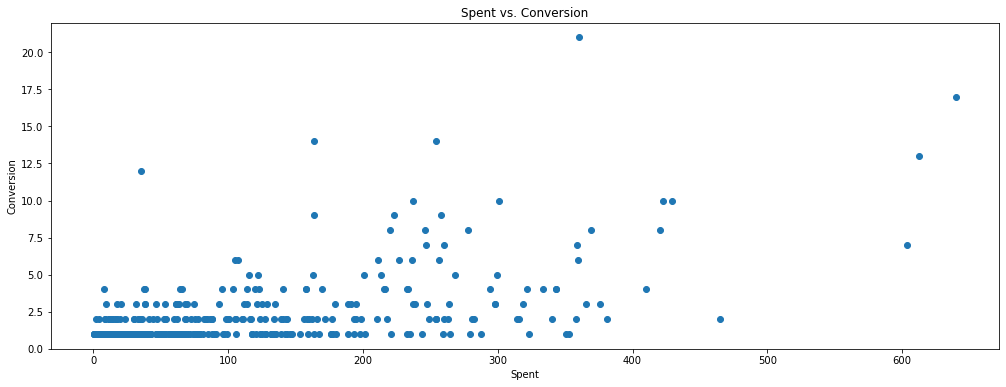

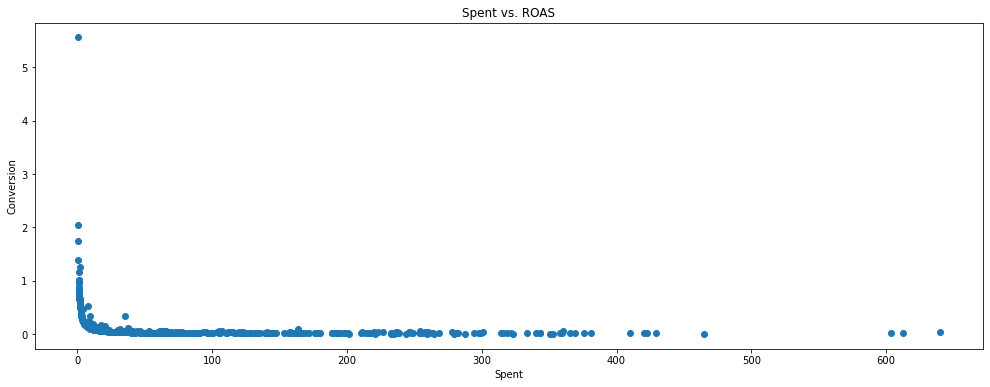

In [475]:
plt.scatter(data = facebook, x= 'Spent',y='Conversion')
plt.title("Spent vs. Conversion")
plt.xlabel("Spent")
plt.ylabel("Conversion")
plt.show()

plt.scatter(data = facebook, x= 'Spent',y='ROAS')
plt.title("Spent vs. ROAS")
plt.xlabel("Spent")
plt.ylabel("Conversion")
plt.show()


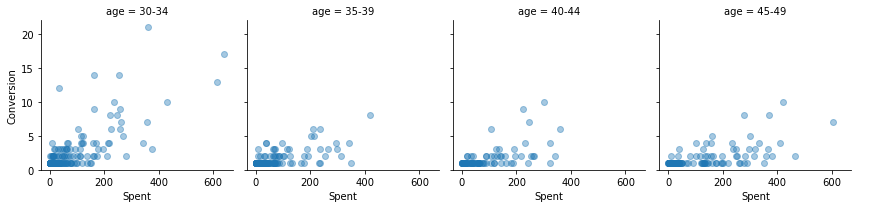

In [476]:
g = sns.FacetGrid(facebook, col="age")
g.map(plt.scatter, "Spent", "Conversion", alpha=.4)
g.add_legend();

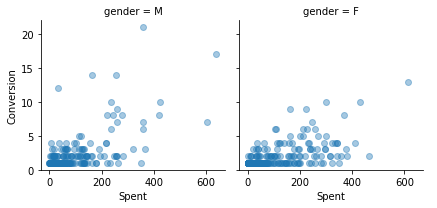

In [477]:
g = sns.FacetGrid(facebook, col="gender")
g.map(plt.scatter, "Spent", "Conversion", alpha=.4)
g.add_legend();

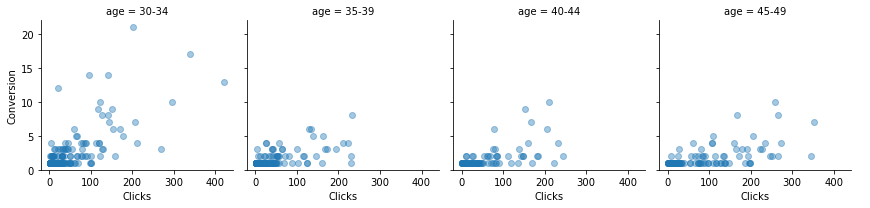

In [478]:
g = sns.FacetGrid(facebook, col="age")
g.map(plt.scatter, "Clicks", "Conversion", alpha=.4)
g.add_legend();

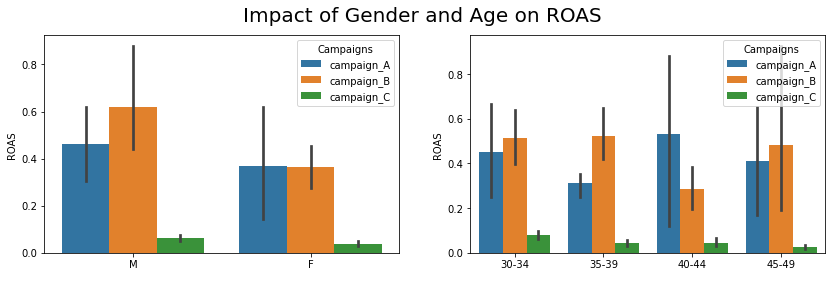

In [479]:
# Let's Compare Campaign according to different Groups

plt.rcParams['figure.figsize'] = (14, 4)

plt.subplot(1, 2, 1)
sns.barplot(data = facebook, x="gender", y="ROAS",
            hue = facebook['Campaigns'])
plt.xlabel(' ')

plt.subplot(1, 2, 2)
sns.barplot(data = facebook, x="age", y="ROAS",
            hue = facebook['Campaigns'] )
plt.xlabel(' ')

plt.suptitle('Impact of Gender and Age on ROAS', fontsize = 20)
plt.show()

In [480]:
fb =facebook.groupby('Campaigns').agg({'Spent': 'sum','Conversion':'sum', 'ROAS':'sum'}).reset_index()
fb

,Campaigns,Spent,Conversion,ROAS
0,campaign_A,75.400000,16,6.82
1,campaign_B,982.949999,118,52.65
2,campaign_C,42892.459950,869,20.14


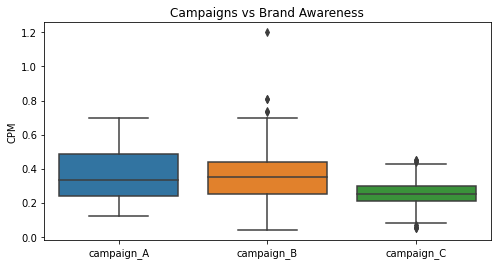

In [481]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.boxplot(data=facebook, x="Campaigns", y="CPM")
plt.title('Campaigns vs Top of the funnel(TOFU)')
plt.xlabel(' ')
plt.show()

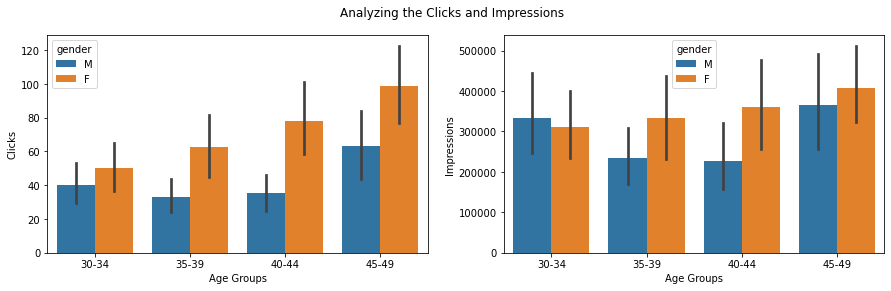

In [482]:
# Lets Analyze the Clicks and Impressions

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.barplot(data = facebook, x="age", y="Clicks", 
            hue = facebook['gender'])
plt.xlabel('Age Groups')

plt.subplot(1, 2, 2)
sns.barplot(data = facebook, x ="age", y ="Impressions", 
            hue = facebook['gender'])
plt.xlabel('Age Groups')

plt.suptitle('Analyzing the Clicks and Impressions')
plt.show()

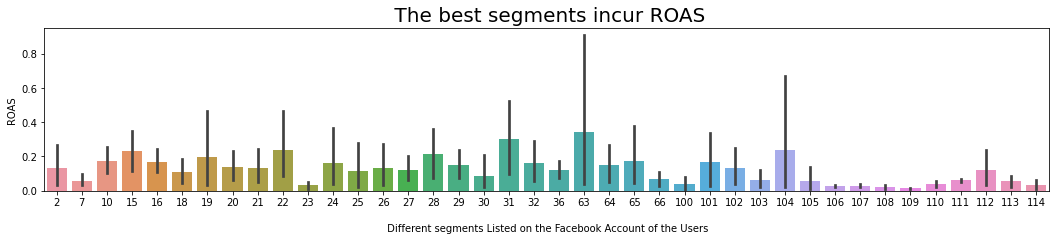

In [483]:
plt.rcParams['figure.figsize'] = (18, 3)
sns.barplot(data =facebook, x="interest", y= "ROAS")
plt.title(' The best segments incur ROAS', fontsize = 20)
plt.xlabel('\n Different segments Listed on the Facebook Account of the Users\n')
plt.show()

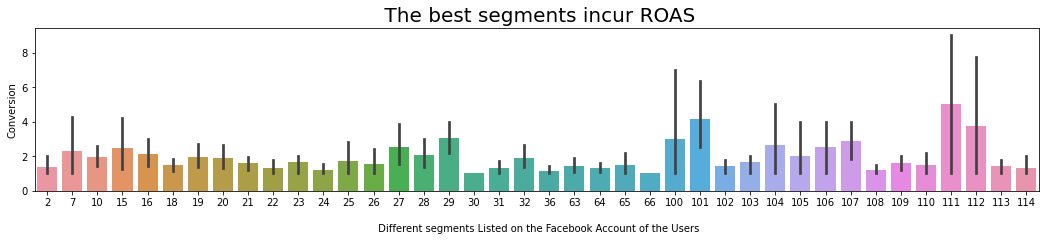

In [484]:
plt.rcParams['figure.figsize'] = (18, 3)
sns.barplot(data = facebook,x="interest", y= "Conversion")
plt.title(' The best segments incur ROAS', fontsize = 20)
plt.xlabel('\n Different segments Listed on the Facebook Account of the Users\n')
plt.show()

In [485]:
#encoding gender
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(facebook["gender"])
facebook["gender"]=encoder.transform(facebook["gender"])
print(facebook["gender"])

0       1
4       1
7       1
14      1
19      1
       ..
1136    0
1137    0
1138    0
1141    0
1142    0
Name: gender, Length: 513, dtype: int32


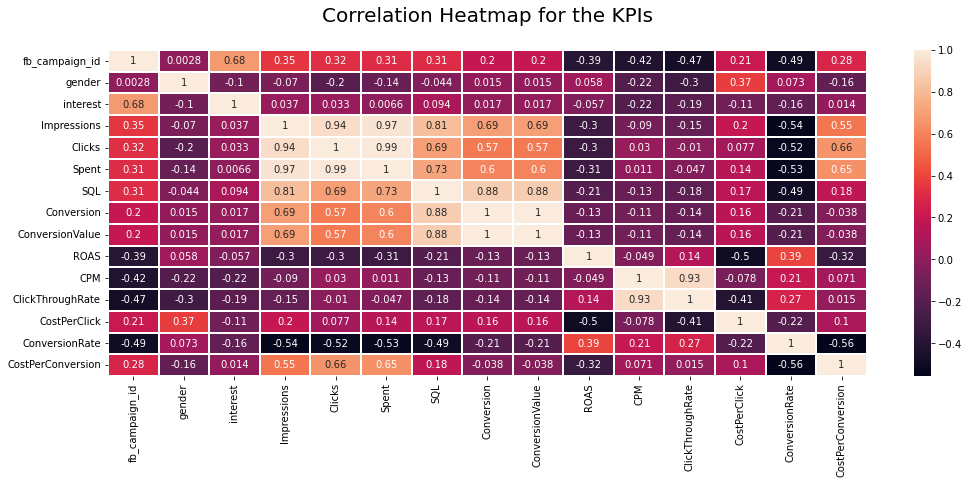

In [486]:
# lets Correlation between all the Factors

plt.rcParams['figure.figsize'] = (17, 6)
sns.heatmap(facebook.corr(), 
            annot = True, linewidths = 2.0)
plt.title('Correlation Heatmap for the KPIs\n', fontsize = 20)
plt.show()

In [487]:
total_metrics_df = facebook.groupby('fb_campaign_id')[['Impressions', 'Clicks', 'Spent','CPM','ROAS','SQL','ConversionRate','CostPerConversion','ClickThroughRate']].mean()
data = pd.DataFrame(total_metrics_df)
data

,Impressions,Clicks,Spent,CPM,ROAS,SQL,ConversionRate,CostPerConversion,ClickThroughRate
fb_campaign_id,,,,,,,,,
103916,7350.0,1.0,1.430000,0.19,0.70,2.0,0.500000,1.430000,0.013605
103928,4133.0,1.0,1.290000,0.31,0.78,1.0,1.000000,1.290000,0.024195
103941,10951.0,1.0,1.270000,0.12,0.79,1.0,1.000000,1.270000,0.009132
103968,14669.0,7.0,10.280000,0.70,0.10,1.0,1.000000,10.280000,0.047720
103989,21026.0,4.0,4.630000,0.22,0.22,2.0,0.500000,4.630000,0.019024
...,...,...,...,...,...,...,...,...,...
179975,877769.0,160.0,232.590001,0.26,0.02,13.0,0.307692,58.147500,0.018228
179976,212508.0,33.0,47.690000,0.22,0.02,4.0,0.250000,47.690000,0.015529
179977,1129773.0,252.0,358.189997,0.32,0.01,13.0,0.153846,179.094999,0.022305


In [488]:
features = total_metrics_df.values


In [489]:
# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.79139884, -0.75817811, -0.77269118, ..., -0.56142466,
        -0.76781492, -0.72519302],
       [-0.80206576, -0.75817811, -0.77434099, ...,  1.07430574,
        -0.77071688,  0.38767496],
       [-0.77945865, -0.75817811, -0.77457668, ...,  1.07430574,
        -0.77113145, -1.19533317],
       ...,
       [ 2.93032862,  3.62582994,  3.43149438, ..., -1.6938534 ,
         2.91487938,  0.18904814],
       [ 1.80454902,  1.58228834,  1.55212588, ..., -1.37928986,
         1.26200437, -0.35973562],
       [ 0.88576804,  1.21549882,  1.16206379, ..., -0.88857074,
         0.9189509 ,  0.17957824]])

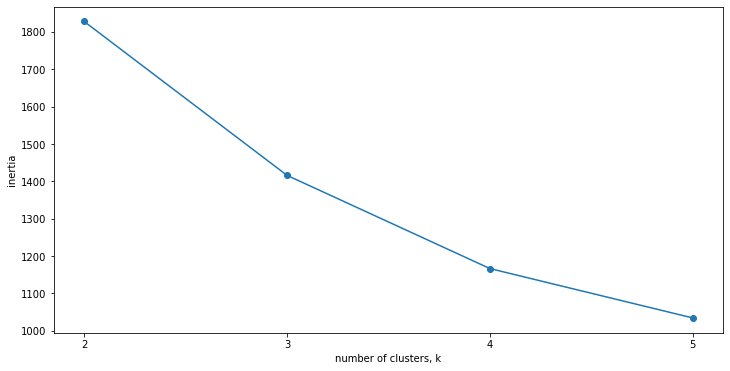

In [490]:
ks = range(2, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters= k)
    clusters =  model.fit(scaled_features)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(12,6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

<AxesSubplot:ylabel='n_clusters'>

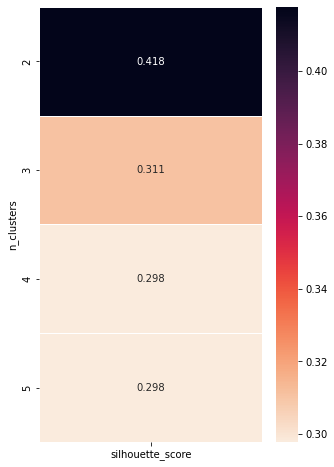

In [536]:
ks = range(2,6)
results = []

for k in ks:
    model = KMeans(n_clusters= k)
    cluster_l = model.fit_predict(scaled_features)
    silh_avg = silhouette_score(scaled_features, cluster_l)
    results.append([k, silh_avg])

result = pd.DataFrame(results, columns = ['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure(figsize=(5,8))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap = 'rocket_r')

In [537]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [538]:
data['Cluster'] = MODEL.predict(scaled_features)
data.head()

,Impressions,Clicks,Spent,CPM,ROAS,SQL,ConversionRate,CostPerConversion,ClickThroughRate,Cluster,Score
fb_campaign_id,,,,,,,,,,,
103916,7350.0,1.0,1.43,0.19,0.70,2.0,0.5,1.43,0.013605,1,0
103928,4133.0,1.0,1.29,0.31,0.78,1.0,1.0,1.29,0.024195,2,0
103941,10951.0,1.0,1.27,0.12,0.79,1.0,1.0,1.27,0.009132,1,0
103968,14669.0,7.0,10.28,0.70,0.10,1.0,1.0,10.28,0.047720,2,0
103989,21026.0,4.0,4.63,0.22,0.22,2.0,0.5,4.63,0.019024,1,0


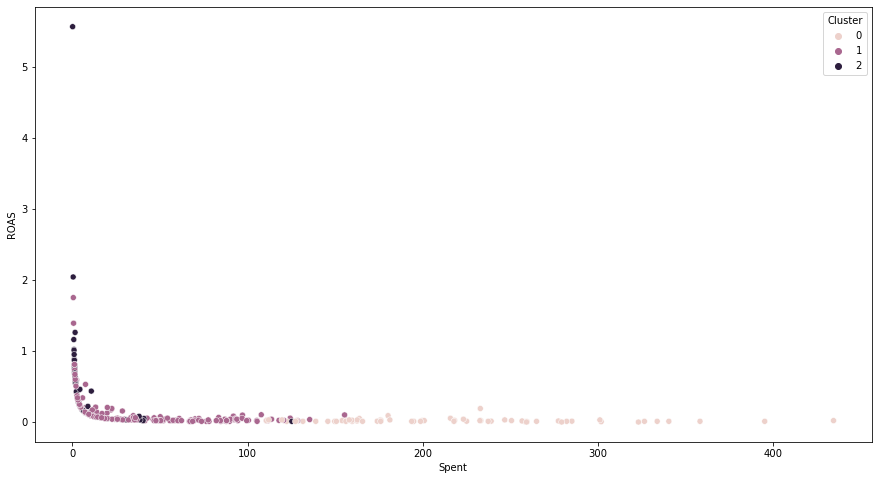

In [539]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='Spent', y='ROAS', hue = 'Cluster')
plt.show()

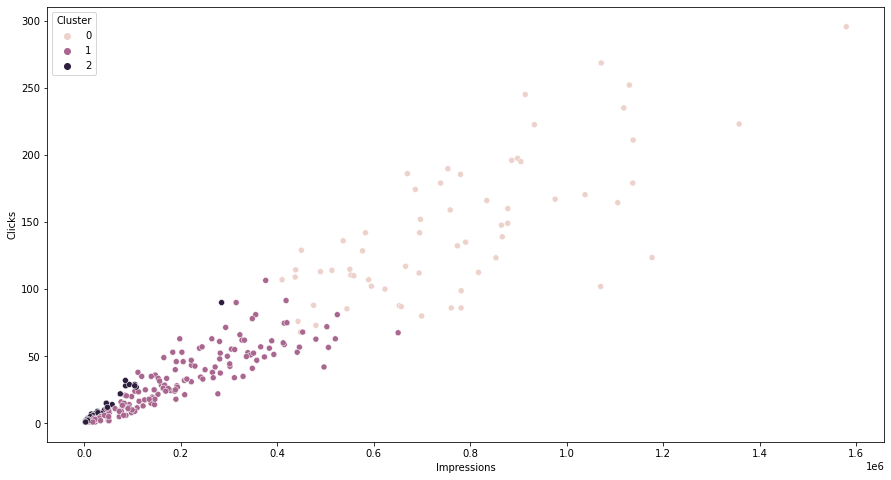

In [540]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='Impressions', y='Clicks', hue ='Cluster')
plt.show()

Text(0.5, 1.05, 'Overview of relathionships between numerical features')

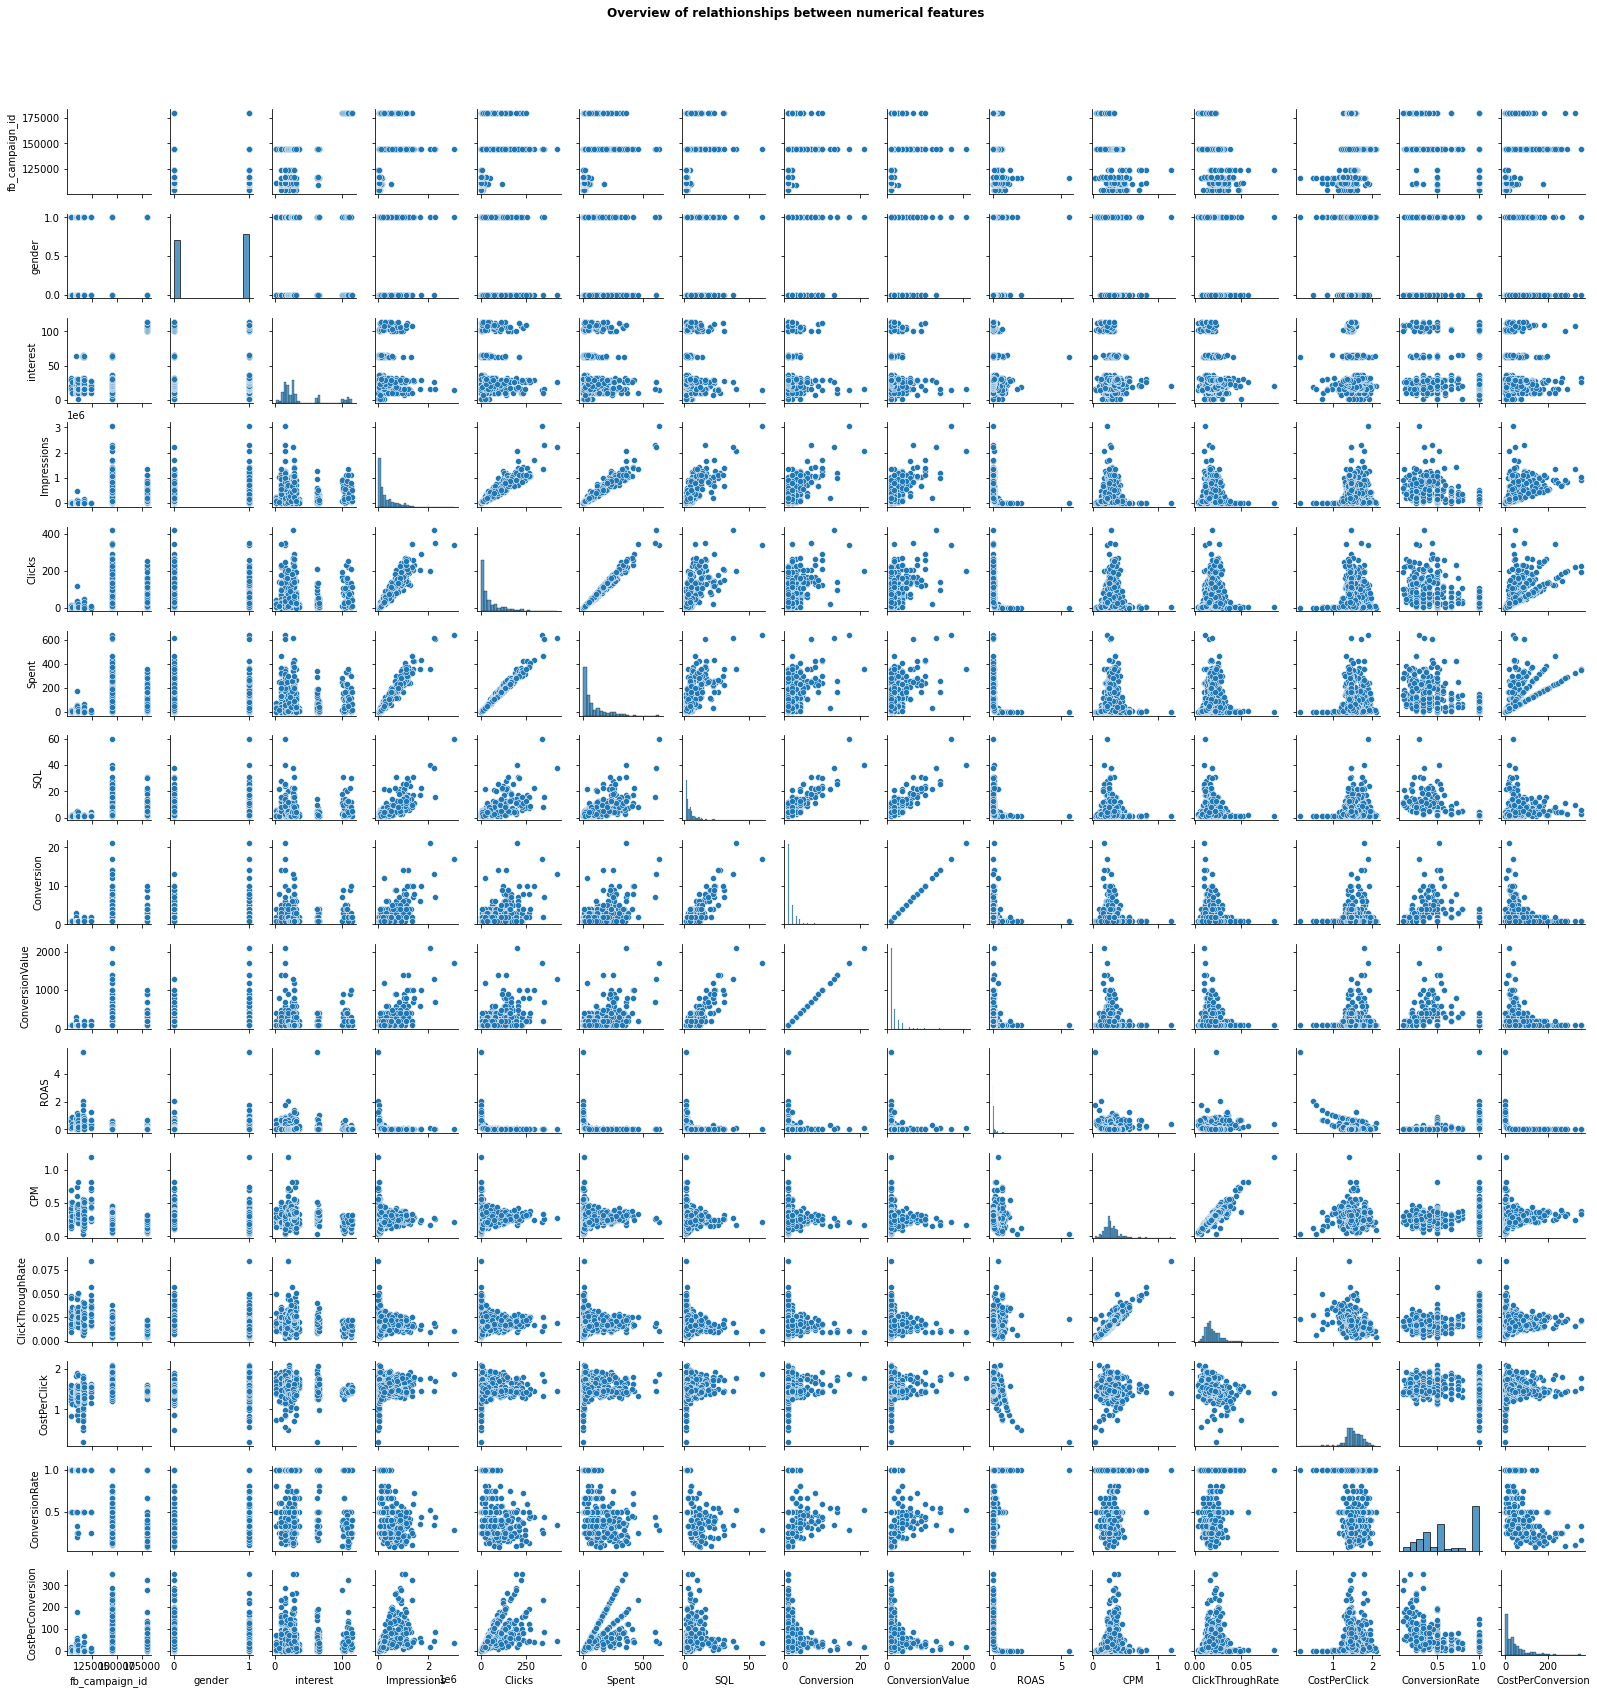

In [541]:
# pairplot positive correlations
sns.pairplot(facebook,height=1.5)
plt.suptitle("Overview of relathionships between numerical features", y=1.05,weight='bold')

In [542]:
score=[]
k= np.arange(2,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    pred = model.fit_predict(data.values)
    sil_score= silhouette_score(data.values, pred)
    score.append(pd.Series({'k': i,
                            'Score': sil_score
                             }))

In [543]:
result= pd.concat(score, axis=1).T.set_index('k')
result

,Score
k,
2.0,0.710364
3.0,0.679617
4.0,0.674553
5.0,0.650301
6.0,0.639870
7.0,0.641490
8.0,0.644956


In [544]:
model = KMeans(n_clusters= 2, max_iter=5)
model.fit(data.values)

KMeans(max_iter=5, n_clusters=2)

In [545]:
data['Score']= model.predict(data.values)
data.sample(5)

,Impressions,Clicks,Spent,CPM,ROAS,SQL,ConversionRate,CostPerConversion,ClickThroughRate,Cluster,Score
fb_campaign_id,,,,,,,,,,,
115735,4726.0,1.0,1.830000,0.390,0.550,1.0,1.000000,1.830000,0.021160,2,0
144649,445800.0,56.8,86.953999,0.188,0.036,5.6,0.335556,78.070666,0.012053,1,1
179947,475184.0,88.0,127.320003,0.270,0.010,4.0,0.250000,127.320003,0.018519,0,1
179915,121769.0,13.0,18.420000,0.150,0.050,2.0,0.500000,18.420000,0.010676,1,0
144581,192879.0,27.0,49.545000,0.255,0.020,2.5,0.625000,49.545000,0.013989,1,0


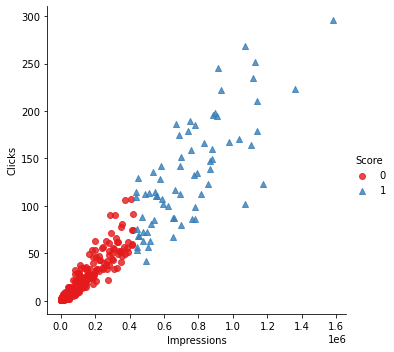

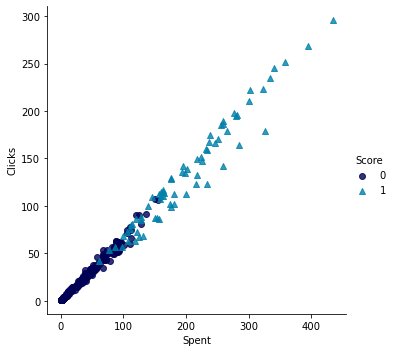

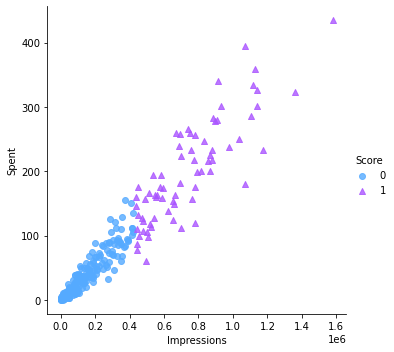

In [546]:
sns.lmplot(x='Impressions', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette='Set1')
sns.lmplot(x='Spent', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"], palette="ocean" )
sns.lmplot(x='Impressions', y='Spent', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette="cool" )
plt.show()

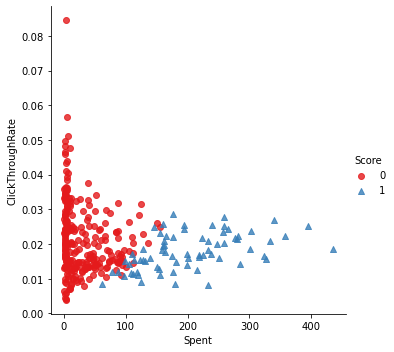

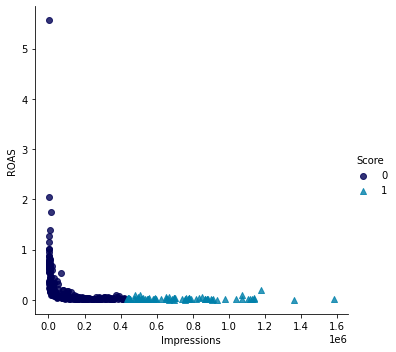

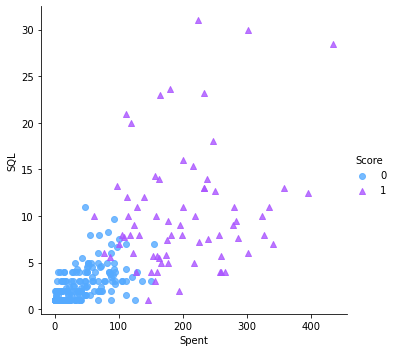

In [528]:
sns.lmplot(x='Spent', y='ClickThroughRate',data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette='Set1')
sns.lmplot(x='Impressions', y='ROAS', data= data, hue='Score',fit_reg=False, markers=["o", "^"], palette="ocean" )
sns.lmplot(x='Spent', y='SQL', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette="cool" )
plt.show()